In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv.imread('soduku.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
normal_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


(551, 545)


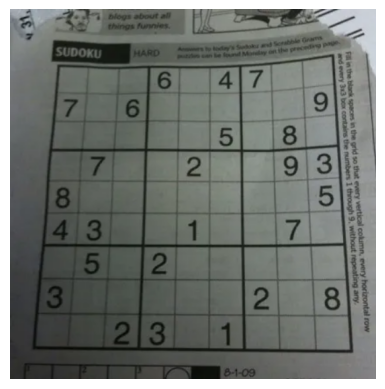

In [4]:
print(gray.shape)
plt.imshow(normal_image)
plt.axis('off')  
plt.show()

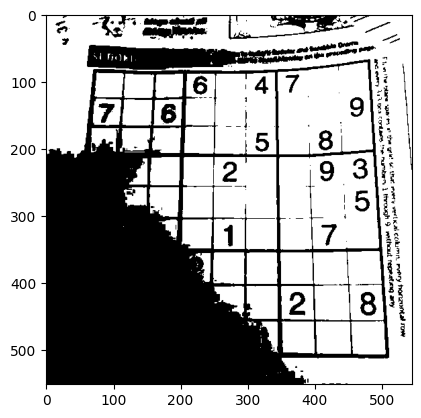

In [5]:
ret2,th2 = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

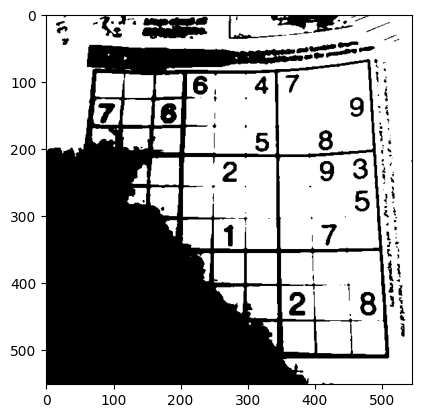

In [6]:
blur = cv.GaussianBlur(gray,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_OTSU)

plt.imshow(th3,cmap='gray')

In [7]:
edges = cv.Canny(gray, 10, 100)

In [8]:
cv.imshow("Edges", edges)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 2)

array([[[180, 173, 168],
        [180, 173, 168],
        [180, 173, 168],
        ...,
        [214, 207, 201],
        [214, 207, 201],
        [214, 207, 201]],

       [[178, 171, 165],
        [178, 171, 165],
        [178, 171, 165],
        ...,
        [214, 207, 201],
        [214, 207, 201],
        [214, 207, 201]],

       [[175, 168, 162],
        [175, 168, 162],
        [176, 168, 163],
        ...,
        [214, 207, 201],
        [214, 207, 201],
        [214, 207, 201]],

       ...,

       [[ 43,  46,  45],
        [ 43,  46,  45],
        [ 43,  46,  45],
        ...,
        [135, 132, 133],
        [135, 133, 133],
        [136, 134, 134]],

       [[ 43,  46,  45],
        [ 43,  46,  45],
        [ 43,  46,  45],
        ...,
        [135, 132, 133],
        [135, 133, 133],
        [136, 134, 134]],

       [[ 43,  46,  45],
        [ 43,  46,  45],
        [ 43,  46,  45],
        ...,
        [135, 132, 133],
        [135, 133, 133],
        [136, 134, 134]]

In [10]:
cv.imshow("Contours", image)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
biggest_contour = max(contours, key=cv.contourArea)
cv.drawContours(image, [biggest_contour], -1, (255, 0, 0), 5)
cv.imshow("Contours", image)
cv.waitKey(0)
cv.destroyAllWindows()


In [12]:
contour_points = biggest_contour[:, 0, :].tolist()

max_x = max(contour_points, key=lambda x: x[0])[0]
min_x = min(contour_points, key=lambda x: x[0])[0]
max_y = max(contour_points, key=lambda x: x[1])[1]
min_y = min(contour_points, key=lambda x: x[1])[1]
p1 = (min_x, min_y)
p2 = (max_x, min_y)
p3 = (max_x, max_y)
p4 = (min_x, max_y)


In [13]:

cv.rectangle(image, p1, p3, (0, 0, 255), 4)  # Green color, thickness=2

cv.imshow("Rectangle", image)
cv.waitKey(0)
cv.destroyAllWindows()  


In [14]:
epsilon = 0.02 * cv.arcLength(biggest_contour, True)  
approx = cv.approxPolyDP(biggest_contour, epsilon, True)

if len(approx) == 4:
    rectangle_points = approx.reshape(4, 2)
    print("Rectangle Corner Points:", rectangle_points)

    for i in range(4):
        cv.line(image, tuple(rectangle_points[i]), tuple(rectangle_points[(i+1) % 4]), (0, 255, 0), 2)

    cv.imshow("Rectangle Approximation", image)
    cv.waitKey(0)
    cv.destroyAllWindows()
else:
    print("The contour is not a perfect rectangle.")

Rectangle Corner Points: [[482  67]
 [ 70  83]
 [ 34 506]
 [510 511]]


In [15]:
image = cv.imread('soduku.png')
for i in range(4):
    cv.line(image, tuple(rectangle_points[i]), tuple(rectangle_points[(i+1) % 4]), (0, 255, 0), 2)
cv.imshow("Rectangle Approximation", image)
cv.waitKey(0)
cv.destroyAllWindows()



In [ ]:
rectangle_points = sorted(rectangle_points, key=lambda x: (x[1], x[0]))
if rectangle_points[0][0] > rectangle_points[1][0]:  # Swap top-left and top-right if needed
    rectangle_points[0], rectangle_points[1] = rectangle_points[1], rectangle_points[0]
if rectangle_points[2][0] < rectangle_points[3][0]:  # Swap bottom-left and bottom-right if needed
    rectangle_points[2], rectangle_points[3] = rectangle_points[3], rectangle_points[2]



print(rectangle_points)

width = 252 
height = 252  
dst_points = np.array([
    [0, 0],        
    [width-1, 0],  
    [width-1, height-1], 
    [0, height-1] 
], dtype="float32")

M = cv.getPerspectiveTransform(np.float32(rectangle_points), dst_points)

warped = cv.warpPerspective(image, M, (width, height))
cv.imshow("Warped Perspective", warped)
cv.waitKey(0)
cv.destroyAllWindows()

[array([68, 81], dtype=int32), array([482,  67], dtype=int32), array([510, 511], dtype=int32), array([ 34, 506], dtype=int32)]


In [16]:
gray_warped = cv.cvtColor(warped, cv.COLOR_BGR2GRAY)

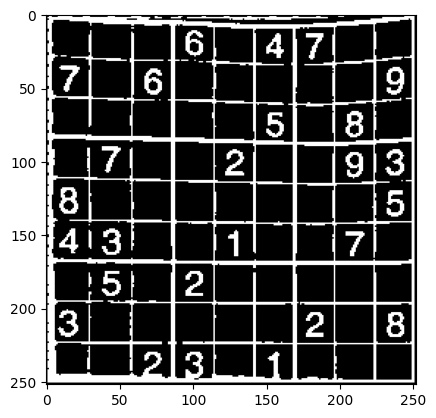

In [41]:
binary = cv.adaptiveThreshold(gray_warped, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,15, 9)
plt.imshow(binary, cmap='gray')


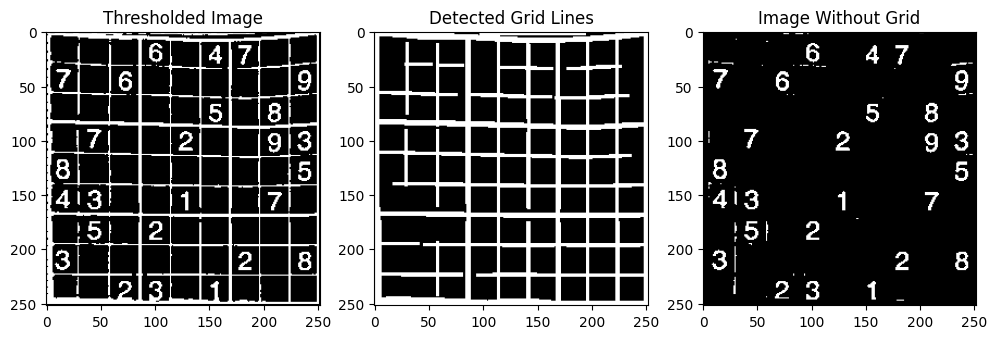

In [46]:
kernel_h = np.ones((1, 10), np.uint8) 
kernel_v = np.ones((25, 1), np.uint8)
horizontal_lines = cv.morphologyEx(binary, cv.MORPH_OPEN, kernel_h, iterations=2)
kernel = np.ones((3,3), np.uint8)
vertical_lines = cv.morphologyEx(binary, cv.MORPH_OPEN, kernel_v, iterations=2)
grid = cv.add(horizontal_lines, vertical_lines)
grid = cv.dilate(grid, kernel, iterations=1)
no_grid = cv.subtract(binary, grid)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(binary, cmap='gray'), plt.title("Thresholded Image")
plt.subplot(1, 3, 2), plt.imshow(grid, cmap='gray'), plt.title("Detected Grid Lines")
plt.subplot(1, 3, 3), plt.imshow(no_grid, cmap='gray'), plt.title("Image Without Grid")
plt.show()

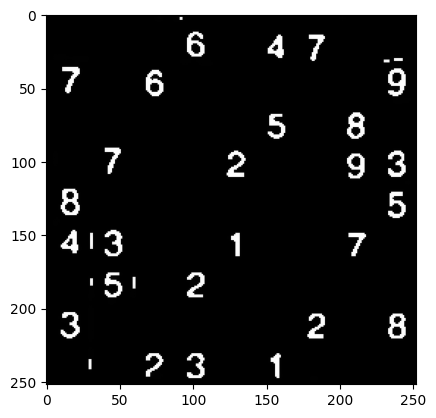

In [47]:
no_noise = cv.bilateralFilter(no_grid, 7, 90, 90)

no_noise = cv.medianBlur(no_noise, 3)
kernel = np.ones((2,2), np.uint8)  # Small kernel to remove noise

no_noise = cv.erode(no_noise, kernel, iterations=1)

no_noise = cv.dilate(no_noise, kernel, iterations=1)


plt.imshow(no_noise, cmap='gray')


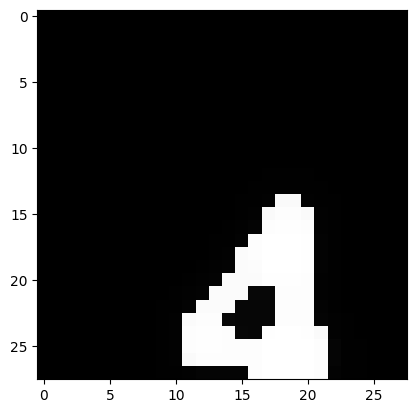

In [48]:

plt.imshow(no_noise[:28, 28*5:28*6], cmap='gray')


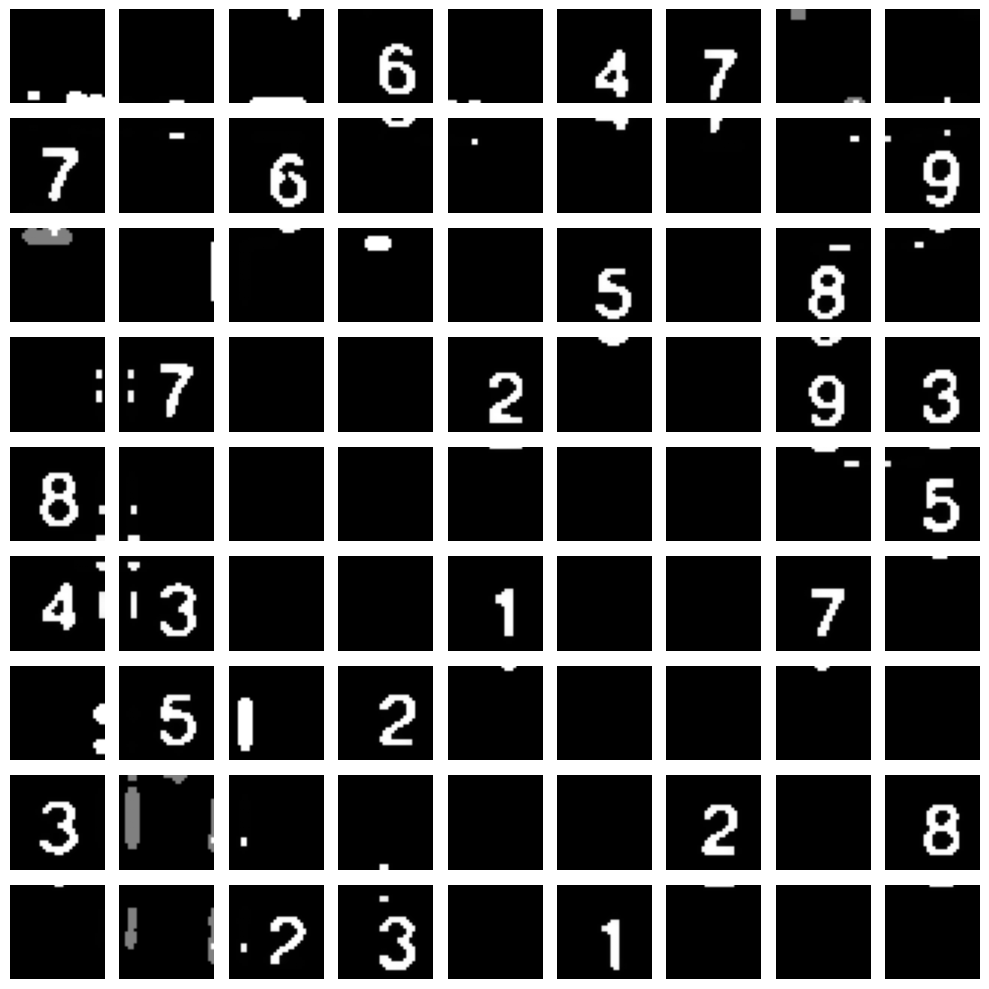

In [21]:
cell_size = 28  # Each cell is 28x28 pixels
grid_size = 9   # 9x9 Sudoku
new_size = 32

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

soduku_grid = []
soduku_idk = []

# Loop over each cell
for i in range(grid_size):
    for j in range(grid_size):
        # Extract the 28x28 cell from the image

        if i == 0 and j == 0:
            cell = no_noise[0:(i + 1) * new_size, 0:(j + 1) * new_size]
        
        elif i == 0 and j != 0 and j != 8:
            cell = no_noise[0:(i + 1) * new_size, (j * cell_size) - 2: ((j + 1) * cell_size) + 2]
        
        elif i == 0 and j == 8:
            cell = no_noise[0:(i + 1) * new_size, (j * cell_size) - 4: ((j + 1) * cell_size)]

        elif i == 8 and j == 0:
            cell = no_noise[(i * cell_size) - 4: ((i + 1) * cell_size), 0:(j + 1) * new_size]
        
        elif i == 8 and j == 8:
            cell = no_noise[(i * cell_size) - 4: ((i + 1) * cell_size), (j * cell_size) - 4: ((j + 1) * cell_size)]
        
        elif i == 8 and j != 0 and j != 8:
            cell = no_noise[(i * cell_size) - 4: ((i + 1) * cell_size), (j * cell_size) - 2: ((j + 1) * cell_size) + 2]
        
        elif i != 0 and i!= 8 and j == 0:
            cell = no_noise[(i * cell_size) - 2:((i + 1) * cell_size) + 2, 0:(j + 1) * new_size]
        
        elif i != 0 and i!= 8 and j == 8:
            cell = no_noise[(i * cell_size) - 2:((i + 1) * cell_size) + 2, (j * cell_size) - 4: ((j + 1) * cell_size)]
        
        elif i != 0 and i!= 8 and j != 0 and j != 8:
            cell = no_noise[(i * cell_size) -2 :((i + 1) * cell_size) + 2, (j * cell_size) -2:((j + 1) * cell_size) + 2]
        
        else: 
            print(f"i = {i}, j = {j}")

        
        # Display in the subplot

        soduku_idk.append(cell) 
        axes[i, j].imshow(cell, cmap='gray')
        axes[i, j].axis("off")  # Hide axes for clarity
    
    soduku_grid.append(soduku_idk)
    soduku_idk = []

plt.tight_layout()
plt.show()

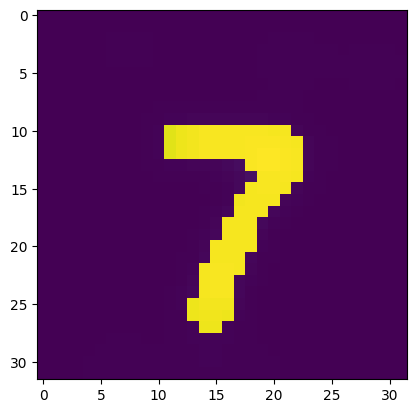

In [22]:
plt.imshow(soduku_grid[1][0])

In [23]:
np.mean(soduku_grid[1][0])

np.float64(21.94921875)

In [24]:
np.mean(soduku_grid[0][0])

np.float64(0.0517578125)

In [25]:
np.mean(soduku_grid[2][0])

np.float64(0.095703125)

In [26]:
soduku_filled = [[True] * 9 for _ in range(9)]
print(soduku_filled)
    
for i in range(grid_size):
    for j in range(grid_size):
        if np.mean(soduku_grid[i][j]) < 10:  # Adjust threshold
            soduku_grid[i][j] = np.zeros_like(soduku_grid[i][j])
            soduku_filled[i][j] = False

[[True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True]]


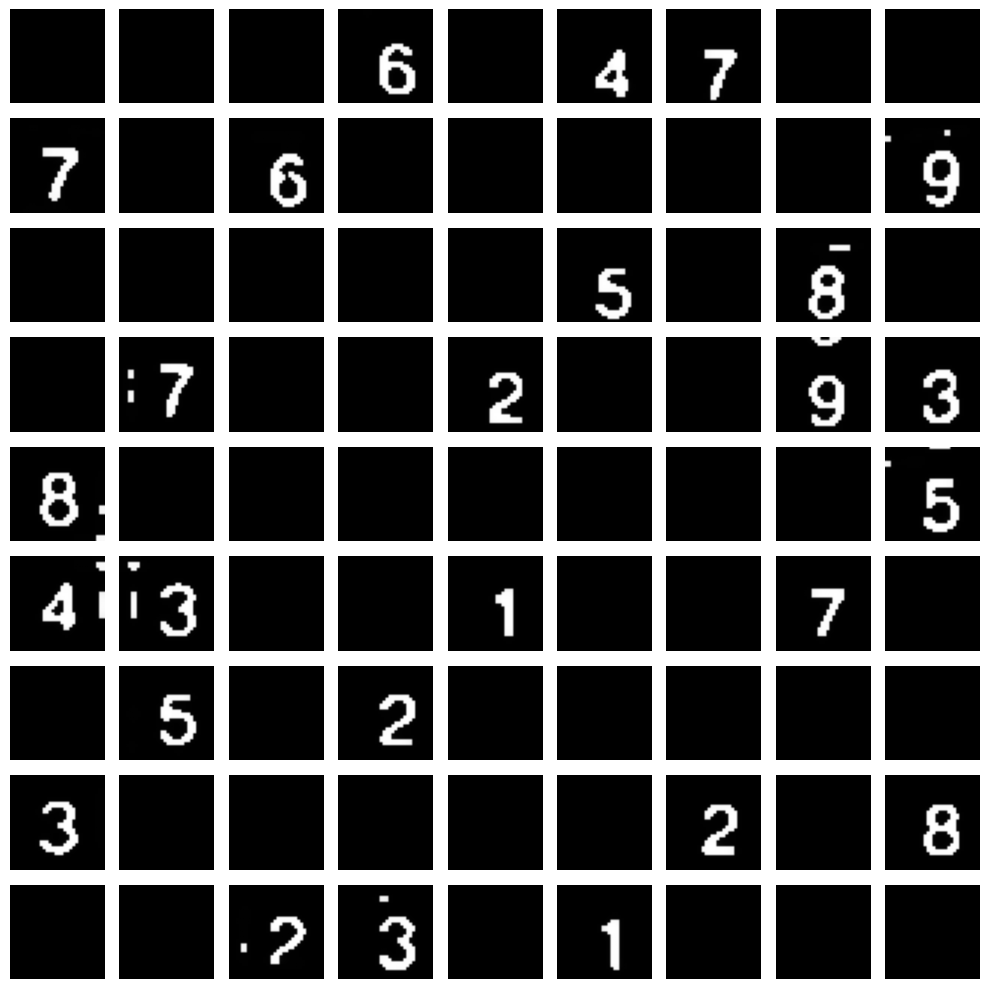

In [27]:
fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
for i in range(grid_size):
    for j in range(grid_size):
        axes[i, j].imshow(soduku_grid[i][j], cmap='gray')
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

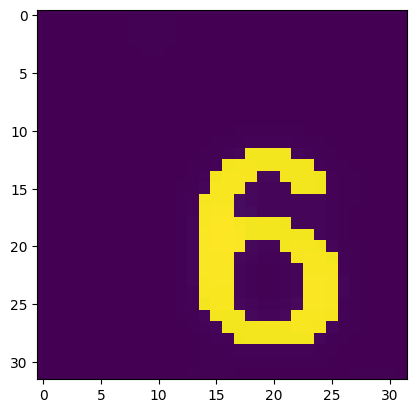

In [28]:
plt.imshow(soduku_grid[0][3])

In [29]:
cell = soduku_grid[0][3]

In [30]:
def center_image(image):
    # Find the coordinates of non-zero pixels
    non_zero_indices = np.nonzero(image)
    
    # Calculate the centroid (mean of non-zero pixel coordinates)
    centroid_x = np.mean(non_zero_indices[0])
    centroid_y = np.mean(non_zero_indices[1])
    
    # Calculate the center of the image (in this case, 16, 16 for a 32x32 image)
    center_x = image.shape[0] // 2
    center_y = image.shape[1] // 2
    
    # Calculate the shift required to center the image
    shift_x = int(center_x - centroid_x)
    shift_y = int(center_y - centroid_y)
    
    # Create a new empty image (32x32) initialized with zeros
    centered_image = np.zeros_like(image)
    
    # Shift the non-zero pixels into the new image
    for i in range(len(non_zero_indices[0])):
        x, y = non_zero_indices[0][i], non_zero_indices[1][i]
        new_x = x + shift_x
        new_y = y + shift_y
        if 0 <= new_x < image.shape[0] and 0 <= new_y < image.shape[1]:
            centered_image[new_x, new_y] = image[x, y]
    
    return centered_image

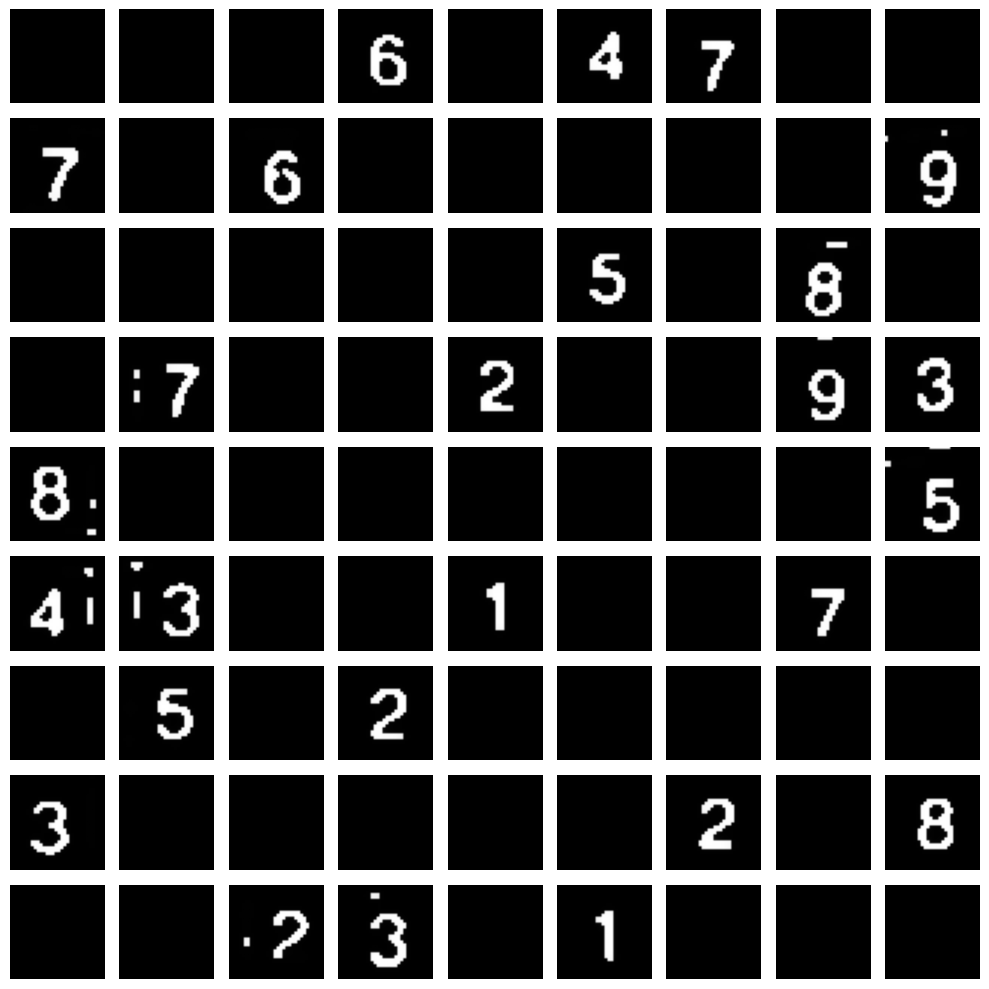

In [31]:
for i in range(grid_size):
    for j in range(grid_size):

        if soduku_filled[i][j] == False:
            continue
        soduku_grid[i][j] = center_image(soduku_grid[i][j])

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
for i in range(grid_size):
    for j in range(grid_size):
        axes[i, j].imshow(soduku_grid[i][j], cmap='gray')
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

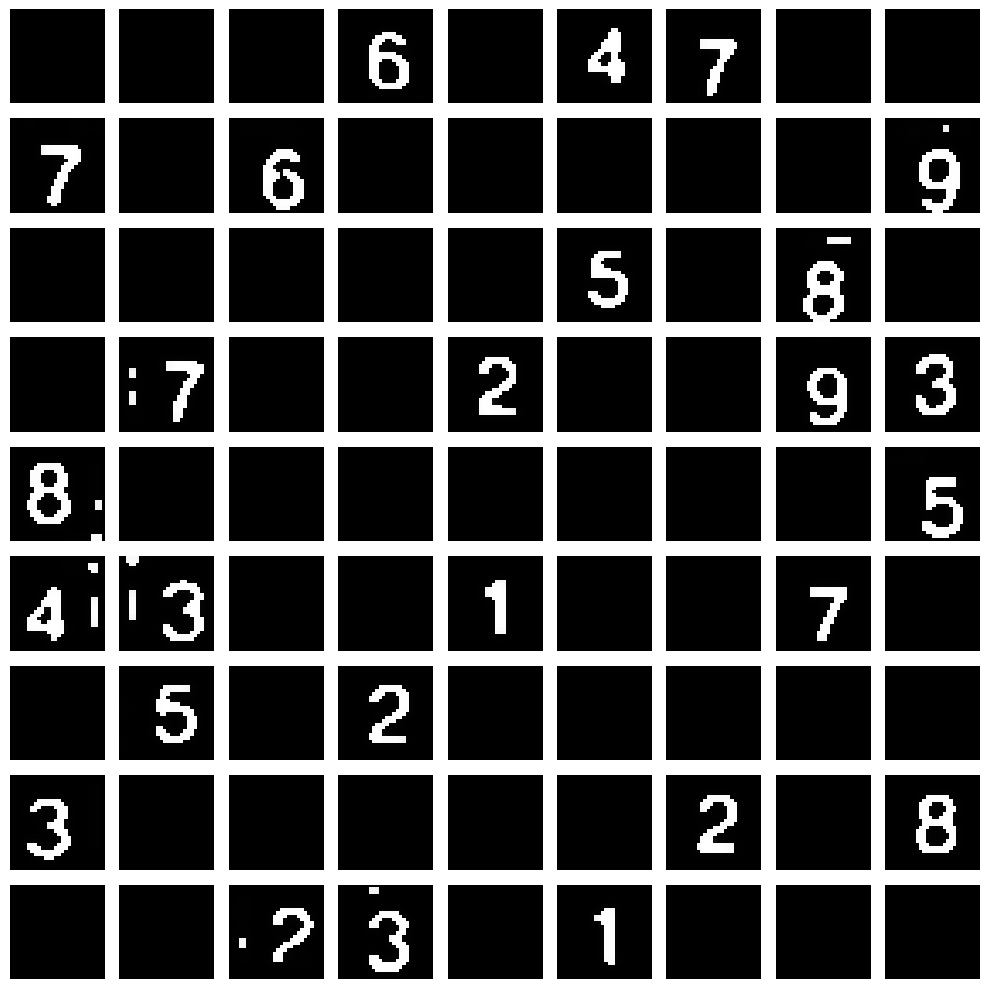

In [32]:
fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

for i in range(grid_size):
    for j in range(grid_size):
        soduku_grid[i][j] = soduku_grid[i][j][2:30, 2:30]
        axes[i, j].imshow(soduku_grid[i][j], cmap='gray')
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

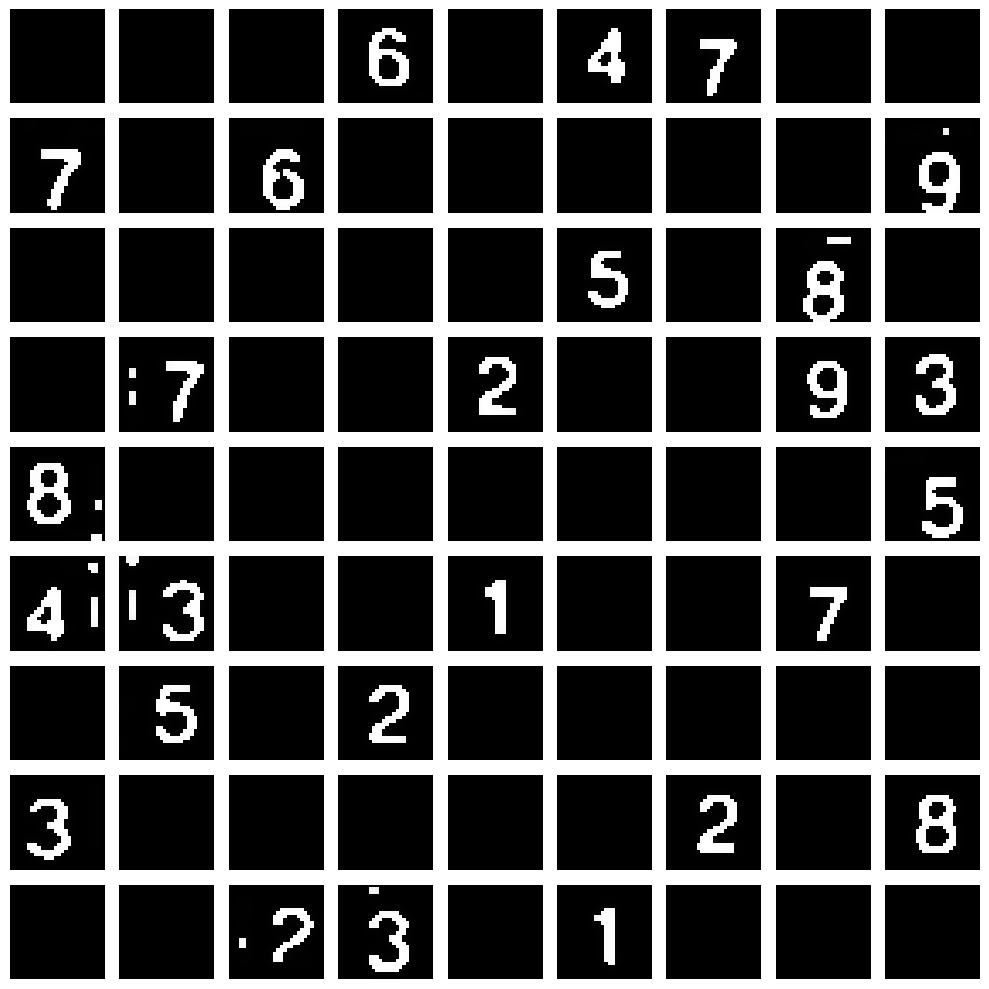

In [33]:
for i in range(grid_size):
    for j in range(grid_size):

        if soduku_filled[i][j] == False:
            continue
        soduku_grid[i][j] = center_image(soduku_grid[i][j])

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
for i in range(grid_size):
    for j in range(grid_size):
        axes[i, j].imshow(soduku_grid[i][j], cmap='gray')
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

In [34]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = joblib.load('knnmodel.pkl')


In [36]:
print(model.predict(soduku_grid[7][0].reshape(-1, 784)))

[3.]


In [37]:
from tensorflow.keras.models import load_model
input_image = soduku_grid[8][2]  # Assuming this is a single 28x28 image

# Reshape to (1, 28, 28, 1) for a single image
input_image = input_image.reshape(1, 28, 28, 1)

# Normalize the image (assuming it's in pixel range [0, 255])
input_image = input_image.astype("float32") / 255.0
# Load the model
model = load_model('cnn_model.h5')

# Now you can use the model to make predictions
predictions = model.predict(input_image)
print(predictions)

2025-03-07 09:23:41.543505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741326821.578230    5255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741326821.587062    5255 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 09:23:41.616947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1741326824.388423    5255 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 34

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.8691777e-08 5.8979749e-05 1.4671683e-03 9.7784318e-04 6.7505222e-05
  2.6270105e-05 1.4204248e-06 9.0519369e-01 2.4178803e-03 8.9789324e-02]]


I0000 00:00:1741326826.686706    5325 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [38]:
print(predictions)

[[1.8691777e-08 5.8979749e-05 1.4671683e-03 9.7784318e-04 6.7505222e-05
  2.6270105e-05 1.4204248e-06 9.0519369e-01 2.4178803e-03 8.9789324e-02]]


In [39]:
predicted_class = np.argmax(predictions, axis=1)


In [40]:
print(predicted_class)

[7]
